# Analysis of the victims of Police Atrocities in US

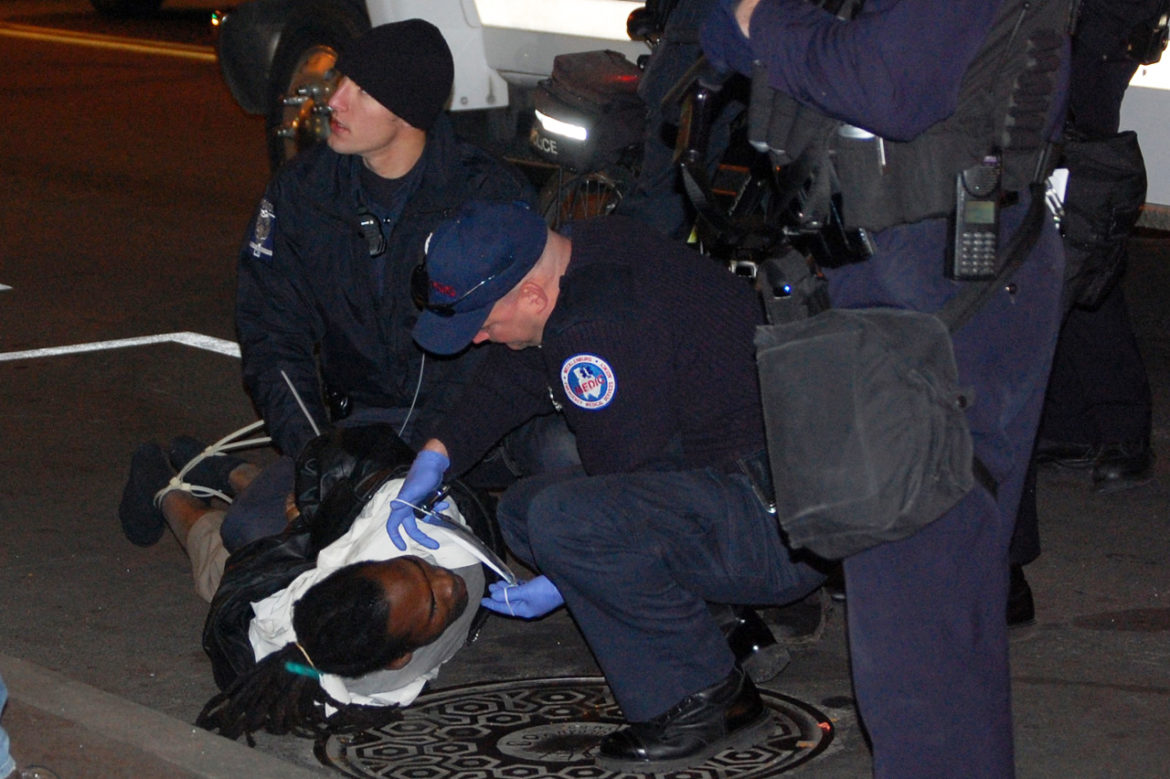

**After George Floyd's death, massive protest started all across the globe against the encounters done by police which are driven by mainly racial factors. The dataset is about deaths of people from different race by the police in US from the year 2000-2020. Below is the Exploratory data analysis using visulaization using an interactive library called "Plotly.**

We will first import the libraries.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
from wordcloud import WordCloud

In [ ]:
data=pd.read_csv("../input/police-fatalities-in-the-us-from-2000-to-2020/police_fatalities.csv")
data.head()

Then we will check the shape of the dataset which is number of rows and columns.

In [ ]:
data.shape

Now we will check whether the data has any missing points or not. Then we will check the data types of the variables in the dataset.

In [ ]:
data.isnull().sum()

In [ ]:
data.info()

Then we will remove the columns which we don't want in our analysis, also there are few variables which are somehow repetative type, I mean it has repeated itself, if you closely watch the dataset, so those must be removed.

In [ ]:
data.drop(columns=["Subject's race with imputations","Imputation probability","URL of image of deceased","Video",
                   "Unique ID formula","Unique identifier (redundant)"],inplace=True)

In [ ]:
data.drop(columns=["Full Address","Link to news article or photo of official document","Unique ID","Date&Description"],inplace=True)

In [ ]:
data.drop(columns=["Date (Year)"],inplace=True)

In [ ]:
data.drop(columns=["Location of injury (address)"],inplace=True)

In [ ]:
data.info()

Now let's change the data types, here age is an object type, we need to change it to the integer type. Also the age column is a bit dirty, so we need to make it clear before converting it into numeric format.

In [ ]:
data["Subject's age"].replace(to_replace="20s",value=28,inplace=True)

In [ ]:
data["Subject's age"].replace(to_replace="60s",value=65,inplace=True)

In [ ]:
data["Subject's age"].replace(to_replace="18-25",value=23,inplace=True)
data["Subject's age"].replace(to_replace="18 months",value=18,inplace=True)
data["Subject's age"].replace(to_replace="46/53",value=53,inplace=True)
data["Subject's age"].replace(to_replace="3 months",value=3,inplace=True)
data["Subject's age"].replace(to_replace="40s",value=45,inplace=True)
data["Subject's age"].replace(to_replace="30s",value=35,inplace=True)
data["Subject's age"].replace(to_replace="50s",value=55,inplace=True)
data["Subject's age"].replace(to_replace="6 months",value=6,inplace=True)
data["Subject's age"].replace(to_replace="9 months",value=9,inplace=True)
data["Subject's age"].replace(to_replace="10 months",value=10,inplace=True)
data["Subject's age"].replace(to_replace="2 months",value=2,inplace=True)
data["Subject's age"].replace(to_replace="7 months",value=7,inplace=True)
data["Subject's age"].replace(to_replace="8 months",value=8,inplace=True)
data["Subject's age"].replace(to_replace="3 days",value=3,inplace=True)
data["Subject's age"].replace(to_replace="20s-30s",value=25,inplace=True)
data["Subject's age"].replace(to_replace="40-50",value=45,inplace=True)
data["Subject's age"].replace(to_replace="4 months",value=4,inplace=True)
data["Subject's age"].replace(to_replace="70s",value=75,inplace=True)

In [ ]:
data["Subject's age"]=pd.to_numeric(data["Subject's age"])

Also we need to change the data type of the date column to make it workable, as currently it is in string format.

In [ ]:
data["Date of injury resulting in death (month/day/year)"]=pd.to_datetime(data["Date of injury resulting in death (month/day/year)"])
data["Year"]=data["Date of injury resulting in death (month/day/year)"].dt.year

In [ ]:
data["Year"]=data["Year"].astype("str")

In [ ]:
data["Year"].replace(to_replace="2100",value="2001",inplace=True)

In [ ]:
data.isnull().sum()

Now we will fill in the missing values.

In [ ]:
data["Location of death (state)"].fillna(value="CA",inplace=True)

In [ ]:
data["Subject's gender"].fillna(value="Female",inplace=True)
data["Cause of death"].fillna(value="Gunshot",inplace=True)
data["Subject's race"].fillna(value="European-American/White",inplace=True)
data["Agency responsible for death"].fillna(value="Los Angeles Police Department",inplace=True)
data["Location of death (county)"].fillna(value="Los Angeles",inplace=True)
data["Location of death (city)"].fillna(value="Chicago",inplace=True)
data["Symptoms of mental illness? INTERNAL USE, NOT FOR ANALYSIS"].fillna(value="Unknown",inplace=True)

In [ ]:
data["Subject's age"].fillna(value=28,inplace=True)

Now let's check whether nulls have been removed or not.

In [ ]:
data.isnull().sum()

In [ ]:
data["Location of death (city)"].nunique()

As this data is a little unclean, so we will clean that, but before that we need to see which are the variables which needs a little cleaning, to do that we need to look into all the variables.

In [ ]:
data["Subject's race"].value_counts()

In [ ]:
data["Subject's race"].replace(to_replace="",value="European-American/White",inplace=True)
data["Subject's race"].replace(to_replace="HIspanic/Latino",value="Hispanic/Latino",inplace=True)

In [ ]:
data["Subject's gender"].replace(to_replace="",value="Female",inplace=True)

In [ ]:
fig4=px.histogram(data,x="Subject's gender",title="Gender distribution",width=700,height=500,color="Subject's gender")
fig4.update_layout(xaxis={'categoryorder':'total descending'})

In [ ]:
px.histogram(data,x="Subject's gender",title="Number of deaths for each race gender wise",width=960,height=700,color="Subject's gender",facet_col="Subject's race",
            facet_col_wrap=3)

In [ ]:
px.box(data,x="Subject's race",y="Subject's age",color="Subject's race",facet_col="Subject's gender",
       facet_col_wrap=2,width=900,height=600,title="Age distribution of all the victims racial and gender wise")

In [ ]:
fig3=px.histogram(data,x="Subject's race",title="How many racial categories are there in our dataset who suffered police attrocities",
                  width=800,height=600,color="Subject's race")
fig3.update_layout(xaxis={'categoryorder':"total descending"})

In [ ]:
fig=px.histogram(data,x="Location of death (state)",title="Number of deaths for each state",color="Location of death (state)",
                 width=900,height=600)
fig.update_layout(xaxis={'categoryorder':'total descending'})

So the above visualization shows that California has the highest number of killings by police, then Texas, and so on, also to see the abbreviation of all the states in the above visualation, you can use https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations.

In [ ]:
px.histogram(data,x="Location of death (state)",title="No of deaths in each state for different race",
                 width=1060,height=800,facet_col="Subject's race",facet_col_wrap=3,color="Subject's race")

So in the above visualization we are trying to see the state wise killings by police for different race.

Now we will add year variable in our analysis.

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(12,6))
data["Year"].value_counts().plot(kind="bar",color="red")
plt.xlabel("Year",size=15,color="black")
plt.ylabel("No of people died year wise",size=15,color="black")
plt.title("Number of people died yearly because of police atrocities",size=18)

So in the above visualization we can see that in the year 2018, most number of people have been killed by police, next is 2019, and so on. Next we will try to see for each year number of people being killed for each state.

In [ ]:
px.histogram(data,x="Location of death (state)",facet_col="Year",facet_col_wrap=5,
             title="Number of deaths in different states for different years",
            color="Year",width=1150,height=1000,template="plotly_dark")

So in the above visualization we can see that in the year 2013, California has the highest deaths, then next California has highest deaths for the year 2015. Talking about other state, Texas has highest deaths in the year 2014, and then in the year 2013.

Next we will try to see how many people from different race has been killed by police for different years.

In [ ]:
px.histogram(data,x="Subject's race",facet_col="Year",facet_col_wrap=5,title="Distribution of deaths due to police attrocities yearly and racial wise",
            color="Year",width=1100,height=900)

As in our dataset many people's race have not been recorded, so in the early few years you can see that there are many people from unspecified race, but in the year 2016, most killed was European-American/White, then most killed was again European-American/White in the year 2015. You can check the viz yourself.

# City wise Analysis

Now let's see top 30 cities in terms of number of deaths for people from different race.

In [ ]:
data["Location of death (city)"].value_counts()[:30].plot(kind="bar",figsize=(12,6),color="darkorchid")
plt.title("Top 30 cities in terms of number of deaths for different racial people",size=18)

So from the above visulazation we can see that most people have died in Chicago, then in Houston, and so on. Now let's see number of people from different race who died in the city Chicago for different years.

In [ ]:
px.histogram(data[data["Location of death (city)"]=="Chicago"],x="Subject's race",title="Number of people from different race died in Chicago in different years",
            width=1100,height=1000,color="Year",facet_col="Year",facet_col_wrap=5)

So in the above visualzation we can see that in the year 2003, most number of people died from the African-American/Black people in Chicago, talking about the later years also African-Americans have continued to died in Chicago, but yeah, frequency have definitely reduced.

Now let's see number of people from different race who died in the city Houston in different years.

In [ ]:
px.histogram(data[data["Location of death (city)"]=="Houston"],x="Subject's race",title="Number of people from different race died in Houston in different years",
            width=1150,height=1000,color="Year",facet_col="Year",facet_col_wrap=5)

So above we can see that 2015 was the year when most African-American died in Houston, then it was in the year 2012, next is in the year 2013 most Hispanic/Latino died in the Houston city. We can do this for different cities also.

# Now let's see cause of deaths for people from different race.

In [ ]:
fig6=px.histogram(data,x="Cause of death",title="Number of people died because of different reasons",
            width=900,height=600,color="Cause of death")
fig6.update_layout(xaxis={'categoryorder':'total descending'})

So in the above visualization we can see that most killings have been done by police is by "Gunshots".

Now let's get a little deeper into this variable, or add more variables to see impact of them altogether. First we will be adding year.

In [ ]:
px.histogram(data,x="Cause of death",title="Number of people died because of different reasons in different years",
            width=1150,height=1000,color="Year",facet_col="Year",facet_col_wrap=5)

So in the above visualzation we can see that for almost all the years most killings have been done by Gunshots, but it was highest in the year 2018.
Next we will see how people from different race were killed.

In [ ]:
px.histogram(data,x="Cause of death",title="Number of people from different race who died because of different reasons",
            width=1100,height=850,color="Subject's race",facet_col="Subject's race",facet_col_wrap=3)

So in the above visualzation we can see that most European-American/White have been shot. Now let's see this for the year 2019.

In [ ]:
px.histogram(data[data["Year"]=="2019"],x="Cause of death",title="Number of people from different race who died because of different reasons in the year 2019",
            width=1050,height=800,color="Subject's race",facet_col="Subject's race",facet_col_wrap=3)

So in the year 2019 most European-American/White have been shot. Now let's see for the year 2018.

In [ ]:
px.histogram(data[data["Year"]=="2018"],x="Cause of death",title="Number of people from different race who died because of different reasons in the year 2018",
            width=1100,height=850,color="Subject's race",facet_col="Subject's race",facet_col_wrap=3)

Now let's see for the year 2000.

In [ ]:
px.histogram(data[data["Year"]=="2000"],x="Cause of death",title="Number of people from different race who died because of different reasons in the year 2000",
            width=1050,height=750,color="Subject's race",facet_col="Subject's race",facet_col_wrap=3)

Now let's see this for the year 2002.

In [ ]:
px.histogram(data[data["Year"]=="2002"],x="Cause of death",title="Number of people from different race who died because of different reasons in the year 2002",
            width=1050,height=850,color="Subject's race",facet_col="Subject's race",facet_col_wrap=3)

# Generating wordcloud for the description related to the death of the person.

In [ ]:
cloud=WordCloud(colormap="autumn",width=800,height=400).generate(str(data["A brief description of the circumstances surrounding the death"]))
fig=plt.figure(figsize=(14,10))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')

# Agencies responsible for the deaths of the people due to racial causes.

In [ ]:
data["Agency responsible for death"].nunique()

So the above piece of code shows that there are in total 6296 agencies involved, now let's see the top 30 agencies who killed the most.

In [ ]:
gradient = data["Agency responsible for death"].value_counts()[:30]
data2 = pd.DataFrame(gradient)
data2.style.background_gradient(cmap="Reds")

**So from the above we can see that "Los Angeles Police Department" has killed the most people. Now let's see frequency of causes of deaths for the people in different years by "Los Angeles Police Department".**

In [ ]:
px.histogram(data[data["Agency responsible for death"]=="Los Angeles Police Department"],x="Cause of death",
             title="Number of people died because of different reasons in different years by Los Angeles Police Department",
            width=1150,height=1000,color="Year",facet_col="Year",facet_col_wrap=5)

Now we will see for Chicago Police Deaprtment.

In [ ]:
px.histogram(data[data["Agency responsible for death"]=="Chicago Police Department"],x="Cause of death",
             title="Number of people died because of different reasons in different years by Chicago Police Department",
            width=1150,height=1000,color="Year",facet_col="Year",facet_col_wrap=5)

Let's see for one more department which is Texas Department of Public Safety, then we will move onto next.

In [ ]:
px.histogram(data[data["Agency responsible for death"]=="Texas Department of Public Safety"],x="Cause of death",
             title="Number of people died because of different reasons in different years by Texas Department of Public Safety",
            width=1150,height=1000,color="Year",facet_col="Year",facet_col_wrap=5)

**Now we will see for these departments, how many people from different race have died over the years. We will start with "Los Angeles Police Department", then we will see for "Chicago Police Department", and then finally we will see for "Texas department of public safety".**

In [ ]:
px.histogram(data[data["Agency responsible for death"]=="Los Angeles Police Department"],x="Subject's race",
             title="Number of people from different race who died in different years by Los Angeles Police Department",
            width=1150,height=1000,color="Year",facet_col="Year",facet_col_wrap=5)

So from the above we can see that in the year 2014 most African-American/Black had been killed by Los Angeles Police Department, then in the year 2008 most Hispanic/Latino had been killed.
Next we will see for Chicago Police Department.

In [ ]:
px.histogram(data[data["Agency responsible for death"]=="Chicago Police Department"],x="Subject's race",
             title="Number of people from different race who died in different years by Chicago Police Department",
            width=1150,height=1000,color="Year",facet_col="Year",facet_col_wrap=5)

So in the year 2011 most African-American had been killed by Chicago Police Department, then again in the year 2014, most African-American/Black had been killed.
Now we will see for Texas Departmentof Public Safety.

In [ ]:
px.histogram(data[data["Agency responsible for death"]=="Texas Department of Public Safety"],x="Subject's race",
             title="Number of people from different race who died in different years by Texas Department of Public Safety",
            width=1150,height=1000,color="Year",facet_col="Year",facet_col_wrap=5)

Lots of more possibilities are there, very soon try to cover up all the possibilities. Also please upvote if you like and give me feedback so that I could improve this further.